In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# **Kiểm tra tính mùa vụ của các bộ dữ liệu**

**`Bộ dữ liệu giá vàng`**
- Ở biểu đồ ACF ta nhận thấy độ tương quan các độ trễ (lags) hầu như đều là 1, là rất cao, tương quan mạnh ở mọi độ trễ
- Ở biểu đồ PACF thì AR = 1 (tự hồi quy bậc nhất) là có tương quan mạnh, sau đó thì độ tương quan giảm với các bậc cao hơn.
- Nhìn vào biểu độ giá có sự biến động mạnh qua thời gian và nhìn chung có xu hướng tăng.
- Ở biểu đồ thể hiện sai số thì từ năm 2018 đến đầu năm 2020, sai số ở mức trung bình nhưng sau đó thì tăng và biến động dẫn đến không ổn định.

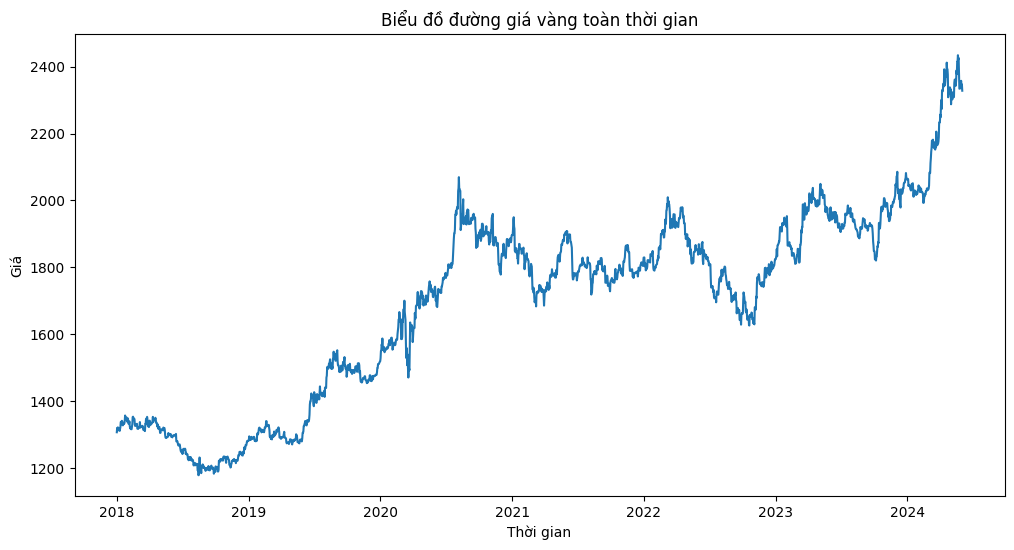

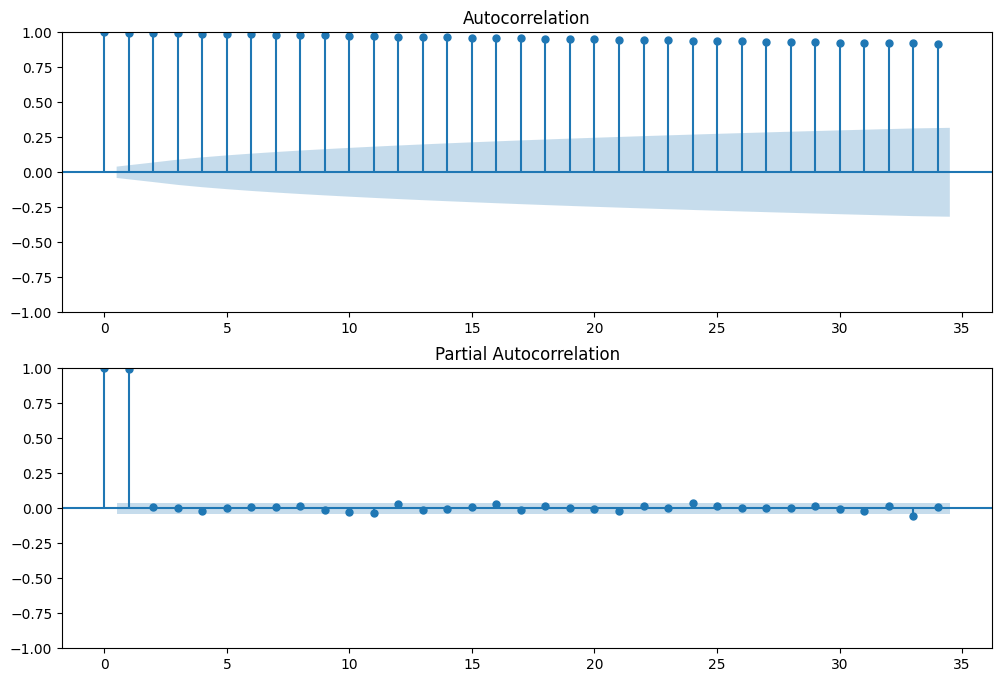

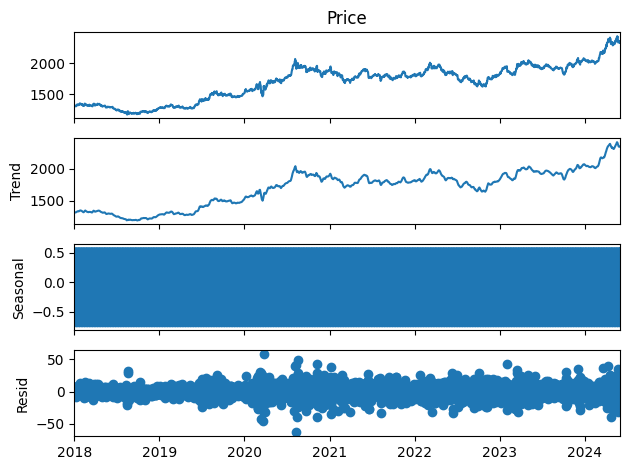

In [ ]:
df_gold = pd.read_csv(r'/content/gold_price_2018_2024.csv', parse_dates=['Date'], index_col='Date')

df_gold.columns = ['Price']
plt.figure(figsize=(12, 6))
plt.plot(df_gold['Price'])
plt.title('Biểu đồ đường giá vàng toàn thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá')
plt.show()

# ACF và PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_gold['Price'], ax=ax[0])
plot_pacf(df_gold['Price'], ax=ax[1])
plt.show()

# Seasonal decomposition
result = seasonal_decompose(df_gold['Price'], model='additive')
result.plot()
plt.show()


**Bộ dữ liệu giá bạch kim**
- Các biểu đồ có sự biến động mạnh như giá vàng

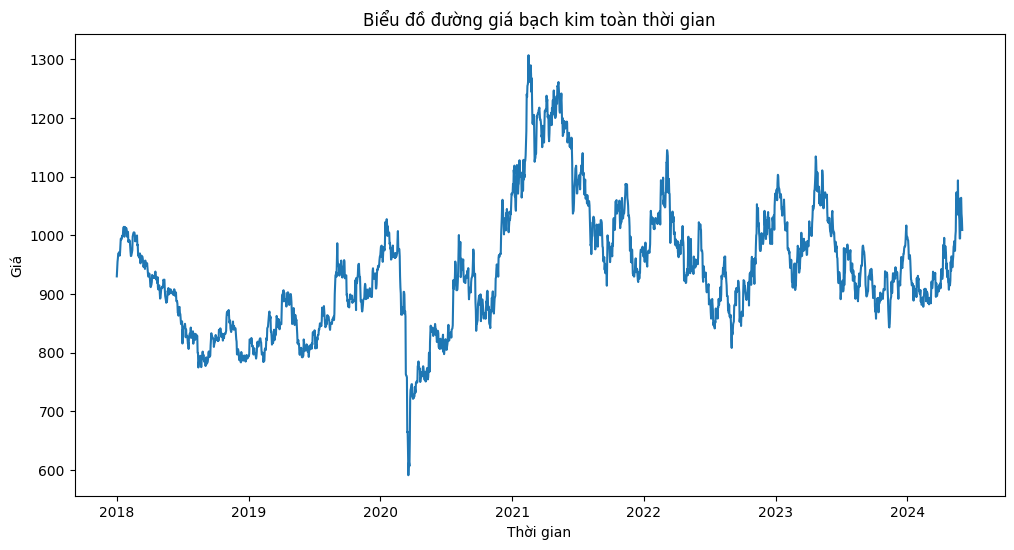

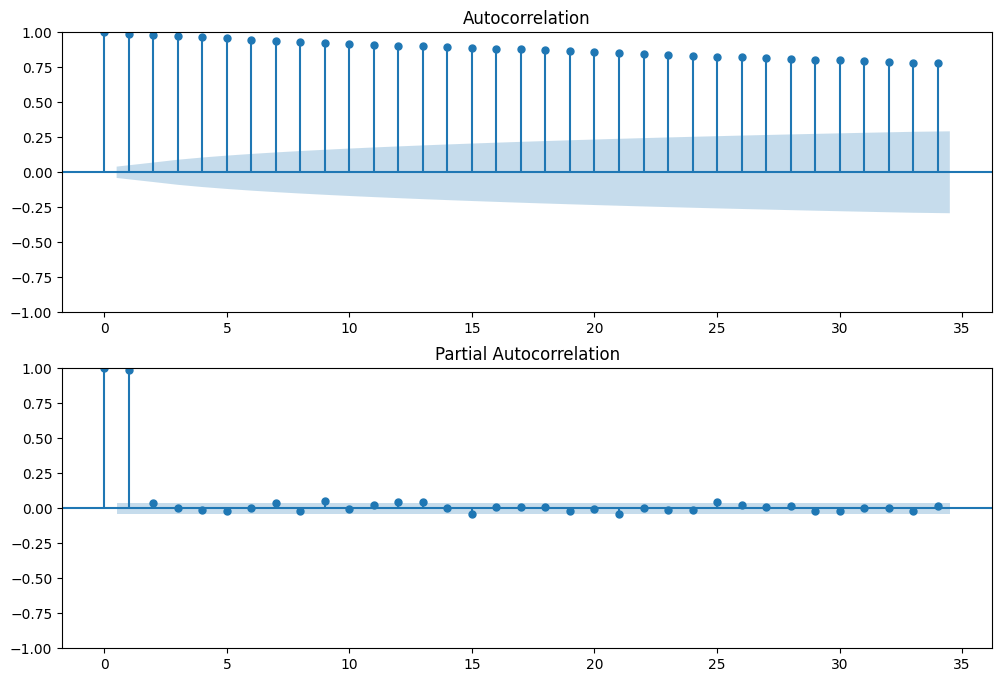

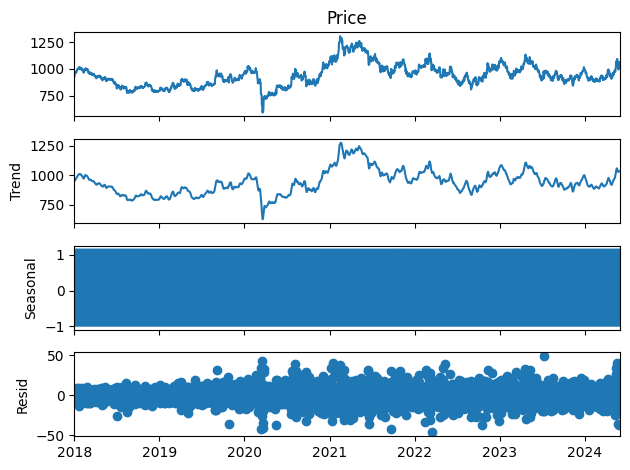

In [ ]:
df_platium = pd.read_csv(r'/content/platium_price_2018_2024.csv', parse_dates=['Date'], index_col='Date')

df_platium.columns = ['Price']
plt.figure(figsize=(12, 6))
plt.plot(df_platium['Price'])
plt.title('Biểu đồ đường giá bạch kim toàn thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá')
plt.show()

# ACF và PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_platium['Price'], ax=ax[0])
plot_pacf(df_platium['Price'], ax=ax[1])
plt.show()

# Seasonal decomposition
result = seasonal_decompose(df_platium['Price'], model='additive')
result.plot()
plt.show()


**Bộ dữ liệu giá bạc**
- Các biểu đồ có biến động gần giống giá vàng nhưng biểu đồ ACF của giá bạc ở các độ trễ cuối có tương quan yếu hơn so với giá vàng nhưng vẫn cáo ở mức 0.8
- Biểu đồ biểu diễn sai số có mức biến động khá thấp vào ổn định từ năm 2018 đến đầu năm 2020 nhưng về sau có sự biến động lớn và không ổn định.

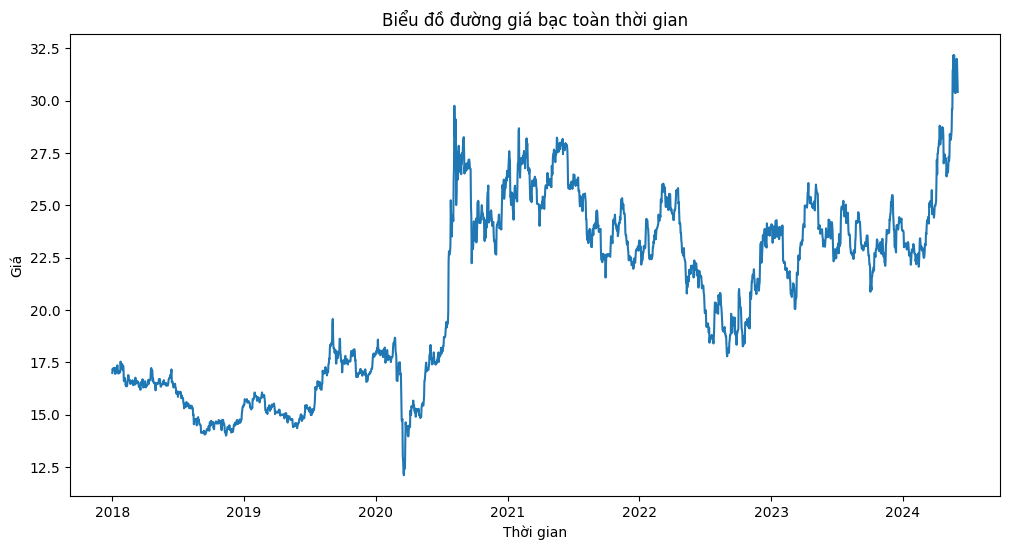

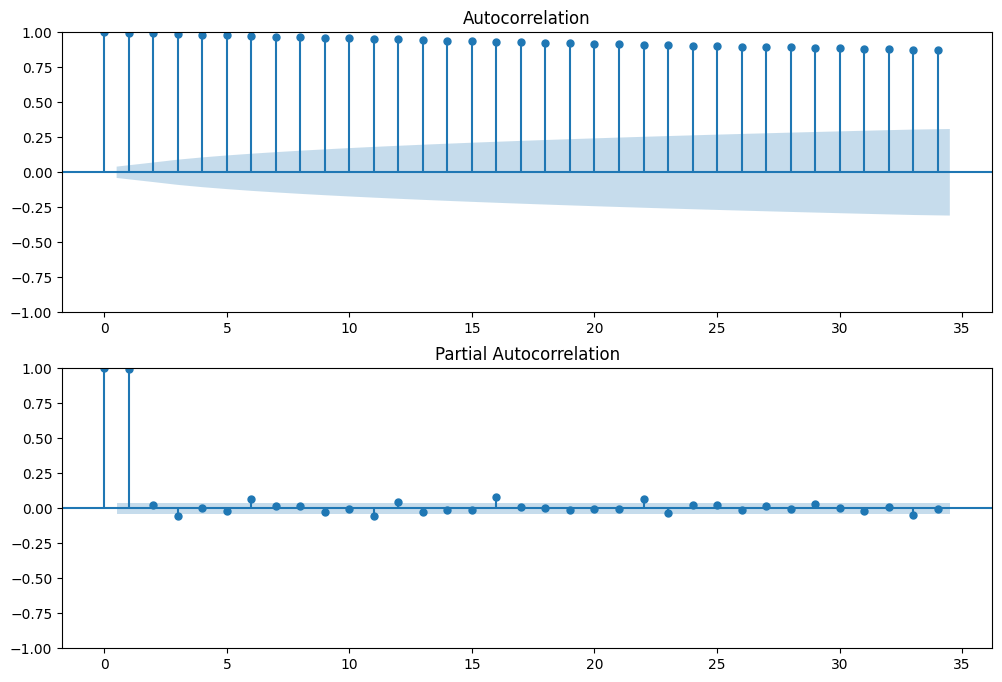

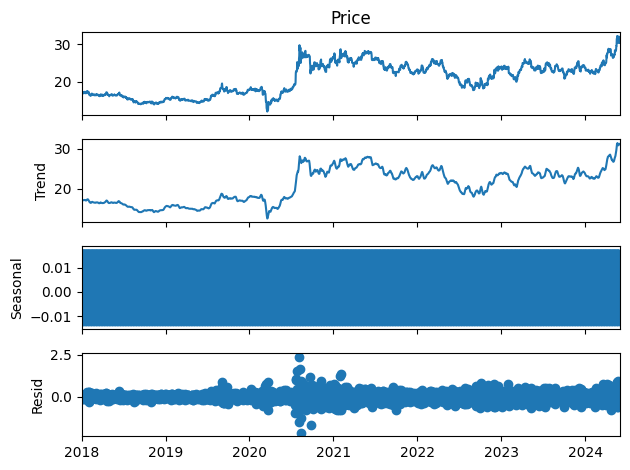

In [ ]:
df_silver = pd.read_csv(r'/content/silver_price_2018_2024.csv', parse_dates=['Date'], index_col='Date')

df_silver.columns = ['Price']
plt.figure(figsize=(12, 6))
plt.plot(df_silver['Price'])
plt.title('Biểu đồ đường giá bạc toàn thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá')
plt.show()

# ACF và PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_silver['Price'], ax=ax[0])
plot_pacf(df_silver['Price'], ax=ax[1])
plt.show()

# Seasonal decomposition
result = seasonal_decompose(df_silver['Price'], model='additive')
result.plot()
plt.show()


# **Thực hiện thuật toán theo tỉ lệ 8:2 (80% train : 20% test)**

In [ ]:
df_gold = pd.read_csv(r'/content/gold_price_2018_2024.csv')

In [ ]:
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Day Number'] = df_gold['Date'].rank(method='dense').astype(int)
df_gold.columns = ['Date','Price','Day Number']
df_gold = df_gold.dropna()
df_gold

,Date,Price,Day Number
0,2018-01-01,1307.018690,1
1,2018-01-02,1319.827953,2
2,2018-01-03,1311.501862,3
3,2018-01-04,1321.635371,4
4,2018-01-05,1319.589185,5
...,...,...,...
2339,2024-05-28,2353.805161,2340
2340,2024-05-29,2357.459733,2341
2341,2024-05-30,2335.806797,2342
2342,2024-05-31,2346.815711,2343


In [ ]:
train_size = int(0.8 * len(df_gold))
test_size = len(df_gold) - train_size

train_data = df_gold.iloc[:train_size]
test_data = df_gold.iloc[train_size:]
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_gold.iloc[train_size:]
test_data.columns = ['Date','Actual Price','Day Number']

In [ ]:

X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     4700.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:30:26   Log-Likelihood:                -11817.
No. Observations:                1875   AIC:                         2.364e+04
Df Residuals:                    1873   BIC:                         2.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1252.1805      6.106    205.073      0.0

In [ ]:

X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]

Y_predict = 1252.1805 + 0.3865 * X1
test_data.insert(1, "Price Predict", Y_predict)
test_data

,Date,Price Predict,Actual Price,Day Number
1875,2023-02-19,1977.2545,1842.564983,1876
1876,2023-02-20,1977.6410,1841.820072,1877
1877,2023-02-21,1978.0275,1835.749945,1878
1878,2023-02-22,1978.4140,1825.069964,1879
1879,2023-02-23,1978.8005,1823.179983,1880
...,...,...,...,...
2339,2024-05-28,2156.5905,2353.805161,2340
2340,2024-05-29,2156.9770,2357.459733,2341
2341,2024-05-30,2157.3635,2335.806797,2342
2342,2024-05-31,2157.7500,2346.815711,2343


In [ ]:
last_day_number = df_gold['Day Number'].max()

# Dự đoán từ 01/06/2024 đến 01/07/2024 (31 ngày)
future_dates_1 = pd.date_range(start='2024-06-01', end='2024-07-01')
future_day_numbers_1 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_1))
future_data_1 = pd.DataFrame({'Date': future_dates_1, 'Day Number': future_day_numbers_1})
future_data_1.insert(1, "Price Predict", (1252.1805 + 0.3865 * (((future_data_1[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/08/2024 (62 ngày)
future_dates_2 = pd.date_range(start='2024-06-01', end='2024-08-01')
future_day_numbers_2 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_2))
future_data_2 = pd.DataFrame({'Date': future_dates_2, 'Day Number': future_day_numbers_2})
future_data_2.insert(1, "Price Predict", (1252.1805 + 0.3865 * (((future_data_2[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/09/2024 (93 ngày)
future_dates_3 = pd.date_range(start='2024-06-01', end='2024-09-01')
future_day_numbers_3 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_3))
future_data_3 = pd.DataFrame({'Date': future_dates_3, 'Day Number': future_day_numbers_3})
future_data_3.insert(1, "Price Predict", (1252.1805 + 0.3865 * (((future_data_3[['Day Number']]).to_numpy())[:, 0])))

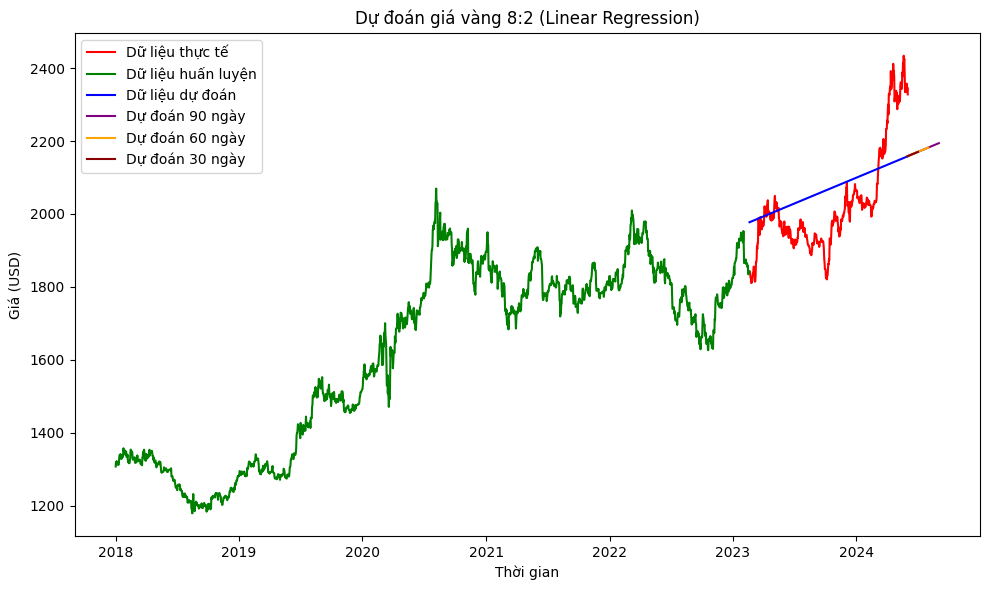

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Actual Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data_3['Date'], future_data_3['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data_2['Date'], future_data_2['Price Predict'], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data_1['Date'], future_data_1['Price Predict'], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá vàng 8:2 (Linear Regression)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Đánh giá mô hình với dữ liệu giá vàng
actual_gold = test_data['Actual Price'].values
predict_gold = test_data['Price Predict'].values

rmse_gold = np.sqrt(mean_squared_error(actual_gold, predict_gold))
mape_gold = np.mean(np.abs((actual_gold - predict_gold) / actual_gold)) * 100
mae_gold = mean_absolute_error(actual_gold, predict_gold)

print(f'RMSE: {rmse_gold}')
print(f'MAPE: {mape_gold}%')
print(f'MAE: {mae_gold}')

RMSE: 116.59283185021073
MAPE: 4.824362149146027%
MAE: 98.3608851601119


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     474.8
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           5.21e-94
Time:                        11:31:12   Log-Likelihood:                -11329.
No. Observations:                1875   AIC:                         2.266e+04
Df Residuals:                    1873   BIC:                         2.267e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        849.1738      4.707    180.391      0.0

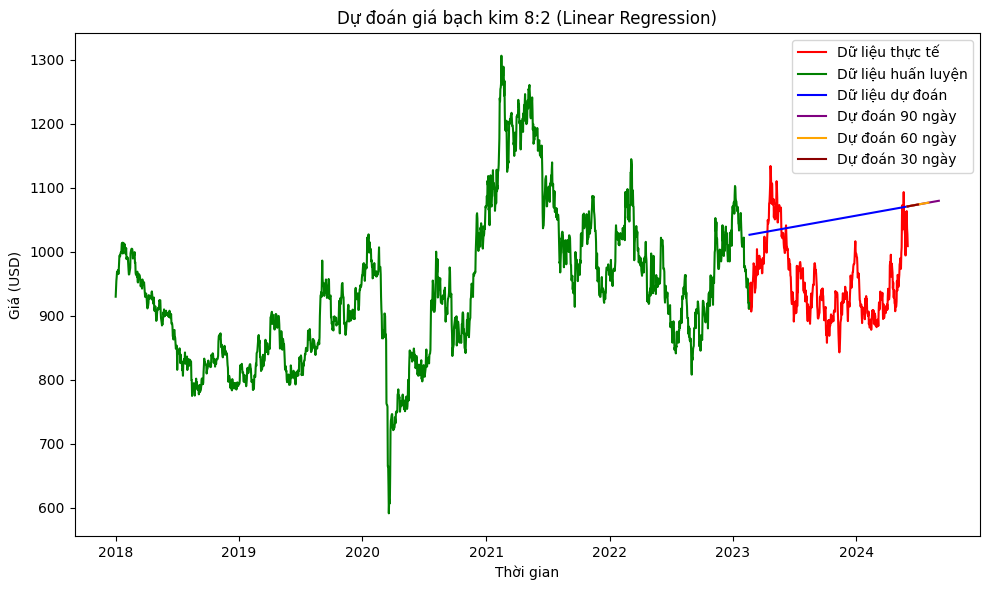

In [ ]:
df_platium = pd.read_csv(r'/content/platium_price_2018_2024.csv')
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Day Number'] = df_platium['Date'].rank(method='dense').astype(int)
df_platium.columns = ['Date','Price','Day Number']
df_platium = df_platium.dropna()

train_data = df_platium.iloc[:train_size]
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_platium.iloc[train_size:]
test_data.columns = ['Date','Actual Price','Day Number']

X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
#X2 = X_test_array[:, 1]
Y_predict = 849.1738 + 0.0947 * X1

test_data.insert(1, "Price Predict", Y_predict)

last_day_number = df_platium['Day Number'].max()

# Dự đoán từ 01/06/2024 đến 01/07/2024 (31 ngày)
future_dates_1 = pd.date_range(start='2024-06-01', end='2024-07-01')
future_day_numbers_1 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_1))
future_data_1 = pd.DataFrame({'Date': future_dates_1, 'Day Number': future_day_numbers_1})
future_data_1.insert(1, "Price Predict", (849.1738 + 0.0947 * (((future_data_1[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/08/2024 (62 ngày)
future_dates_2 = pd.date_range(start='2024-06-01', end='2024-08-01')
future_day_numbers_2 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_2))
future_data_2 = pd.DataFrame({'Date': future_dates_2, 'Day Number': future_day_numbers_2})
future_data_2.insert(1, "Price Predict", (849.1738 + 0.0947 * (((future_data_2[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/09/2024 (93 ngày)
future_dates_3 = pd.date_range(start='2024-06-01', end='2024-09-01')
future_day_numbers_3 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_3))
future_data_3 = pd.DataFrame({'Date': future_dates_3, 'Day Number': future_day_numbers_3})
future_data_3.insert(1, "Price Predict", (849.1738 + 0.0947 * (((future_data_3[['Day Number']]).to_numpy())[:, 0])))

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Actual Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data_3['Date'], future_data_3['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data_2['Date'], future_data_2['Price Predict'], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data_1['Date'], future_data_1['Price Predict'], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạch kim 8:2 (Linear Regression)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Đánh giá mô hình với dữ liệu giá bạch kim
actual_platium = test_data['Actual Price'].values
predict_platium = test_data['Price Predict'].values

rmse_platium = np.sqrt(mean_squared_error(actual_platium, predict_platium))
mape_platium = np.mean(np.abs((actual_platium - predict_platium) / actual_platium)) * 100
mae_platium = mean_absolute_error(actual_platium, predict_platium)

print(f'RMSE: {rmse_platium}')
print(f'MAPE: {mape_platium}%')
print(f'MAE: {mae_platium}')

RMSE: 114.16493461993969
MAPE: 11.086778166408468%
MAE: 102.75470923096742


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     1707.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          8.31e-266
Time:                        11:31:21   Log-Likelihood:                -4778.1
No. Observations:                1875   AIC:                             9560.
Df Residuals:                    1873   BIC:                             9571.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8462      0.143    103.797      0.0

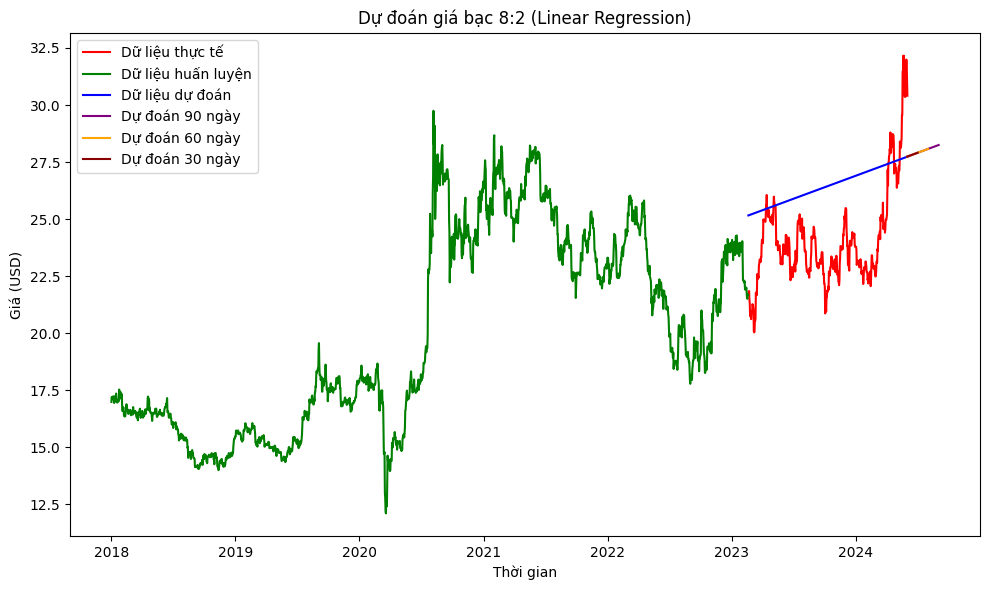

In [ ]:
df_silver = pd.read_csv(r'/content/silver_price_2018_2024.csv')
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Day Number'] = df_silver['Date'].rank(method='dense').astype(int)
df_silver.columns = ['Date','Price','Day Number']
df_silver = df_silver.dropna()


train_data = df_silver.iloc[:train_size]
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_silver.iloc[train_size:]
test_data.columns = ['Date','Actual Price','Day Number']


X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
Y_predict = 14.8462 + 0.0055 * X1

test_data.insert(1, "Price Predict", Y_predict)

last_day_number = df_silver['Day Number'].max()

# Dự đoán từ 01/06/2024 đến 01/07/2024 (31 ngày)
future_dates_1 = pd.date_range(start='2024-06-01', end='2024-07-01')
future_day_numbers_1 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_1))
future_data_1 = pd.DataFrame({'Date': future_dates_1, 'Day Number': future_day_numbers_1})
future_data_1.insert(1, "Price Predict", (14.8462 + 0.0055 * (((future_data_1[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/08/2024 (62 ngày)
future_dates_2 = pd.date_range(start='2024-06-01', end='2024-08-01')
future_day_numbers_2 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_2))
future_data_2 = pd.DataFrame({'Date': future_dates_2, 'Day Number': future_day_numbers_2})
future_data_2.insert(1, "Price Predict", (14.8462 + 0.0055 * (((future_data_2[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/09/2024 (93 ngày)
future_dates_3 = pd.date_range(start='2024-06-01', end='2024-09-01')
future_day_numbers_3 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_3))
future_data_3 = pd.DataFrame({'Date': future_dates_3, 'Day Number': future_day_numbers_3})
future_data_3.insert(1, "Price Predict", (14.8462 + 0.0055 * (((future_data_3[['Day Number']]).to_numpy())[:, 0])))

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Actual Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data_3['Date'], future_data_3['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data_2['Date'], future_data_2['Price Predict'], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data_1['Date'], future_data_1['Price Predict'], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạc 8:2 (Linear Regression)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Đánh giá mô hình với dữ liệu giá bạc
actual_silver = test_data['Actual Price'].values
predict_silver = test_data['Price Predict'].values

rmse_silver = np.sqrt(mean_squared_error(actual_silver, predict_silver))
mape_silver = np.mean(np.abs((actual_silver - predict_silver) / actual_silver)) * 100
mae_silver = mean_absolute_error(actual_silver, predict_silver)

print(f'RMSE: {rmse_silver}')
print(f'MAPE: {mape_silver}%')
print(f'MAE: {mae_silver}')

RMSE: 2.985565232086106
MAPE: 11.399609296113375%
MAE: 2.6592291890756927


# **Thực hiện thuật toán theo tỉ lệ 7:3 (70% train : 30% test)**

                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     6992.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:31:28   Log-Likelihood:                -10057.
No. Observations:                1640   AIC:                         2.012e+04
Df Residuals:                    1638   BIC:                         2.013e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1194.4554      5.508    216.850      0.0

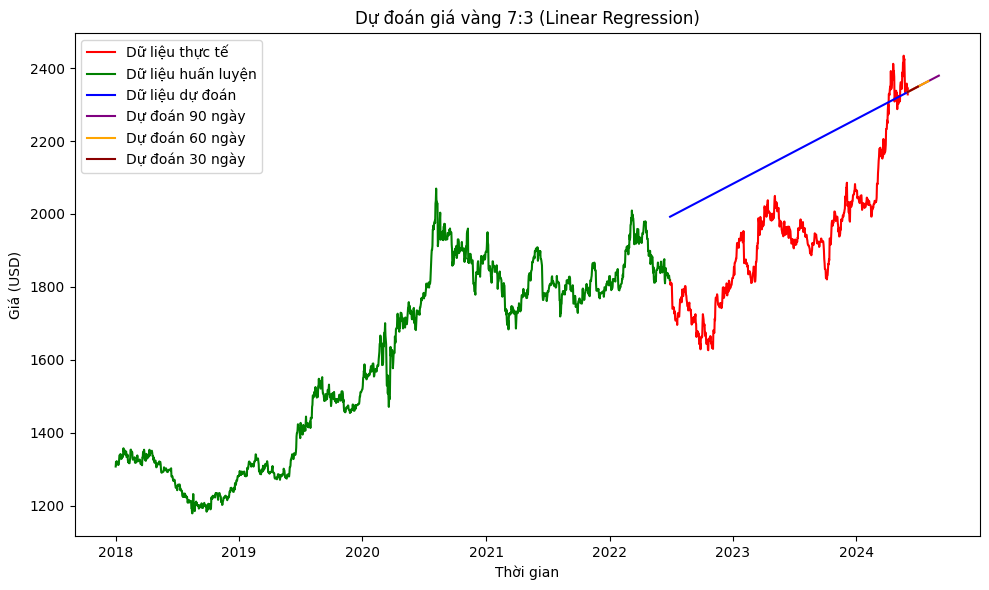

In [ ]:
df_gold = pd.read_csv(r'/content/gold_price_2018_2024.csv')

df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Day Number'] = df_gold['Date'].rank(method='dense').astype(int)
df_gold.columns = ['Date','Price','Day Number']
df_gold = df_gold.dropna()

train_size = int(0.7 * len(df_gold))
test_size = len(df_gold) - train_size

train_data = df_gold.iloc[:train_size]
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_gold.iloc[train_size:]
test_data.columns = ['Date','Actual Price','Day Number']

X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]

Y_predict = 1194.4554 + 0.4862 * X1
test_data.insert(1, "Price Predict", Y_predict)

last_day_number = df_gold['Day Number'].max()

# Dự đoán từ 01/06/2024 đến 01/07/2024 (31 ngày)
future_dates_1 = pd.date_range(start='2024-06-01', end='2024-07-01')
future_day_numbers_1 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_1))
future_data_1 = pd.DataFrame({'Date': future_dates_1, 'Day Number': future_day_numbers_1})
future_data_1.insert(1, "Price Predict", (1194.4554 + 0.4862 * (((future_data_1[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/08/2024 (62 ngày)
future_dates_2 = pd.date_range(start='2024-06-01', end='2024-08-01')
future_day_numbers_2 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_2))
future_data_2 = pd.DataFrame({'Date': future_dates_2, 'Day Number': future_day_numbers_2})
future_data_2.insert(1, "Price Predict", (1194.4554 + 0.4862 * (((future_data_2[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/09/2024 (93 ngày)
future_dates_3 = pd.date_range(start='2024-06-01', end='2024-09-01')
future_day_numbers_3 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_3))
future_data_3 = pd.DataFrame({'Date': future_dates_3, 'Day Number': future_day_numbers_3})
future_data_3.insert(1, "Price Predict", (1194.4554 + 0.4862 * (((future_data_3[['Day Number']]).to_numpy())[:, 0])))

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Actual Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data_3['Date'], future_data_3['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data_2['Date'], future_data_2['Price Predict'], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data_1['Date'], future_data_1['Price Predict'], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá vàng 7:3 (Linear Regression)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Đánh giá mô hình với dữ liệu giá vàng
actual_gold = test_data['Actual Price'].values
predict_gold = test_data['Price Predict'].values

rmse_gold = np.sqrt(mean_squared_error(actual_gold, predict_gold))
mape_gold = np.mean(np.abs((actual_gold - predict_gold) / actual_gold)) * 100
mae_gold = mean_absolute_error(actual_gold, predict_gold)

print(f'RMSE: {rmse_gold}')
print(f'MAPE: {mape_gold}%')
print(f'MAE: {mae_gold}')

RMSE: 245.57575346604511
MAPE: 12.212220967225432%
MAE: 228.18477094402235


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     640.3
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          1.65e-119
Time:                        11:31:36   Log-Likelihood:                -9892.1
No. Observations:                1640   AIC:                         1.979e+04
Df Residuals:                    1638   BIC:                         1.980e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        827.3750      4.982    166.079      0.0

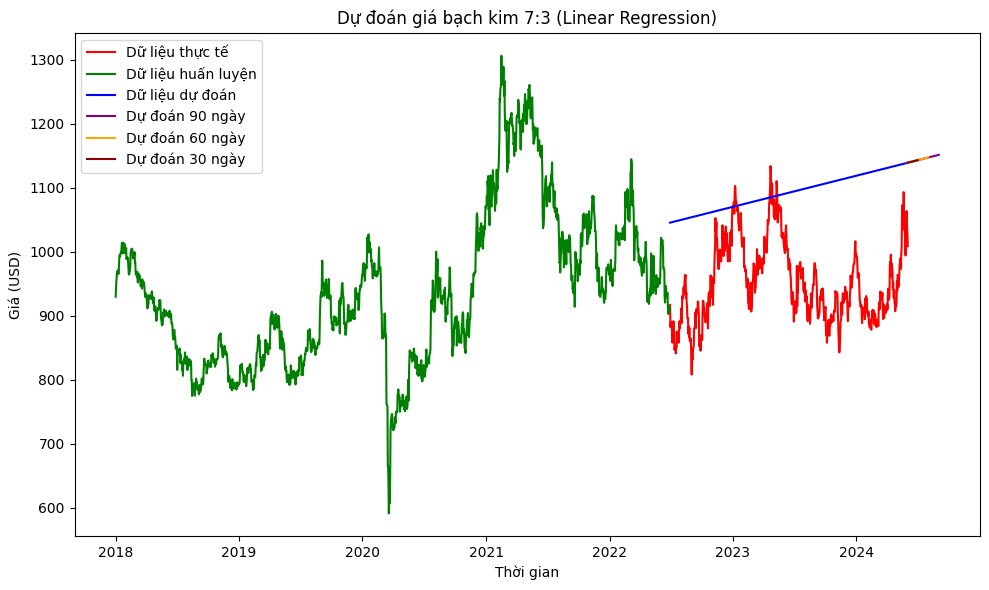

In [ ]:
df_platium = pd.read_csv(r'/content/platium_price_2018_2024.csv')
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Day Number'] = df_platium['Date'].rank(method='dense').astype(int)
df_platium.columns = ['Date','Price','Day Number']
df_platium = df_platium.dropna()

train_data = df_platium.iloc[:train_size]
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_platium.iloc[train_size:]
test_data.columns = ['Date','Actual Price','Day Number']

X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
Y_predict = 827.3750 + 0.1331 * X1

test_data.insert(1, "Price Predict", Y_predict)

last_day_number = df_platium['Day Number'].max()

# Dự đoán từ 01/06/2024 đến 01/07/2024 (31 ngày)
future_dates_1 = pd.date_range(start='2024-06-01', end='2024-07-01')
future_day_numbers_1 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_1))
future_data_1 = pd.DataFrame({'Date': future_dates_1, 'Day Number': future_day_numbers_1})
future_data_1.insert(1, "Price Predict", (827.3750 + 0.1331 * (((future_data_1[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/08/2024 (62 ngày)
future_dates_2 = pd.date_range(start='2024-06-01', end='2024-08-01')
future_day_numbers_2 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_2))
future_data_2 = pd.DataFrame({'Date': future_dates_2, 'Day Number': future_day_numbers_2})
future_data_2.insert(1, "Price Predict", (827.3750 + 0.1331 * (((future_data_2[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/09/2024 (93 ngày)
future_dates_3 = pd.date_range(start='2024-06-01', end='2024-09-01')
future_day_numbers_3 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_3))
future_data_3 = pd.DataFrame({'Date': future_dates_3, 'Day Number': future_day_numbers_3})
future_data_3.insert(1, "Price Predict", (827.3750 + 0.1331 * (((future_data_3[['Day Number']]).to_numpy())[:, 0])))

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Actual Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data_3['Date'], future_data_3['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data_2['Date'], future_data_2['Price Predict'], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data_1['Date'], future_data_1['Price Predict'], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạch kim 7:3 (Linear Regression)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Đánh giá mô hình với dữ liệu giá bạch kim
actual_platium = test_data['Actual Price'].values
predict_platium = test_data['Price Predict'].values

rmse_platium = np.sqrt(mean_squared_error(actual_platium, predict_platium))
mape_platium = np.mean(np.abs((actual_platium - predict_platium) / actual_platium)) * 100
mae_platium = mean_absolute_error(actual_platium, predict_platium)

print(f'RMSE: {rmse_platium}')
print(f'MAPE: {mape_platium}%')
print(f'MAE: {mae_platium}')

RMSE: 156.3784157152703
MAPE: 15.36505817518903%
MAE: 141.8673335228811


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2791.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:31:46   Log-Likelihood:                -3977.4
No. Observations:                1640   AIC:                             7959.
Df Residuals:                    1638   BIC:                             7970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6466      0.135    100.909      0.0

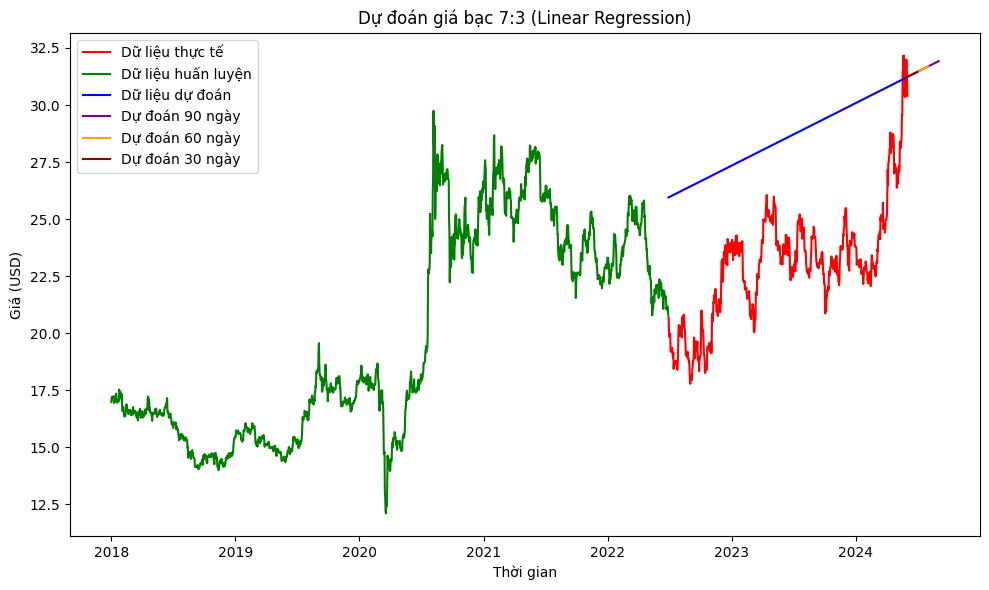

In [ ]:
df_silver = pd.read_csv(r'/content/silver_price_2018_2024.csv')
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Day Number'] = df_silver['Date'].rank(method='dense').astype(int)
df_silver.columns = ['Date','Price','Day Number']
df_silver = df_silver.dropna()


train_data = df_silver.iloc[:train_size]
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_silver.iloc[train_size:]
test_data.columns = ['Date','Actual Price','Day Number']


X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
Y_predict = 13.6466 + 0.0075 * X1

test_data.insert(1, "Price Predict", Y_predict)

last_day_number = df_silver['Day Number'].max()

# Dự đoán từ 01/06/2024 đến 01/07/2024 (31 ngày)
future_dates_1 = pd.date_range(start='2024-06-01', end='2024-07-01')
future_day_numbers_1 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_1))
future_data_1 = pd.DataFrame({'Date': future_dates_1, 'Day Number': future_day_numbers_1})
future_data_1.insert(1, "Price Predict", (13.6466 + 0.0075 * (((future_data_1[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/08/2024 (62 ngày)
future_dates_2 = pd.date_range(start='2024-06-01', end='2024-08-01')
future_day_numbers_2 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_2))
future_data_2 = pd.DataFrame({'Date': future_dates_2, 'Day Number': future_day_numbers_2})
future_data_2.insert(1, "Price Predict", (13.6466 + 0.0075 * (((future_data_2[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/09/2024 (93 ngày)
future_dates_3 = pd.date_range(start='2024-06-01', end='2024-09-01')
future_day_numbers_3 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_3))
future_data_3 = pd.DataFrame({'Date': future_dates_3, 'Day Number': future_day_numbers_3})
future_data_3.insert(1, "Price Predict", (13.6466 + 0.0075 * (((future_data_3[['Day Number']]).to_numpy())[:, 0])))

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Actual Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data_3['Date'], future_data_3['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data_2['Date'], future_data_2['Price Predict'], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data_1['Date'], future_data_1['Price Predict'], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạc 7:3 (Linear Regression)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Đánh giá mô hình với dữ liệu giá bạc
actual_silver = test_data['Actual Price'].values
predict_silver = test_data['Price Predict'].values

rmse_silver = np.sqrt(mean_squared_error(actual_silver, predict_silver))
mape_silver = np.mean(np.abs((actual_silver - predict_silver) / actual_silver)) * 100
mae_silver = mean_absolute_error(actual_silver, predict_silver)

print(f'RMSE: {rmse_silver}')
print(f'MAPE: {mape_silver}%')
print(f'MAE: {mae_silver}')

RMSE: 5.836361352630851
MAPE: 25.16291629413568%
MAE: 5.576962167833663


# **Thực hiện thuật toán theo tỉ lệ 9:1 (90% train : 10% test)**

                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     6229.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:32:26   Log-Likelihood:                -13230.
No. Observations:                2109   AIC:                         2.646e+04
Df Residuals:                    2107   BIC:                         2.647e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1268.5200      5.590    226.923      0.0

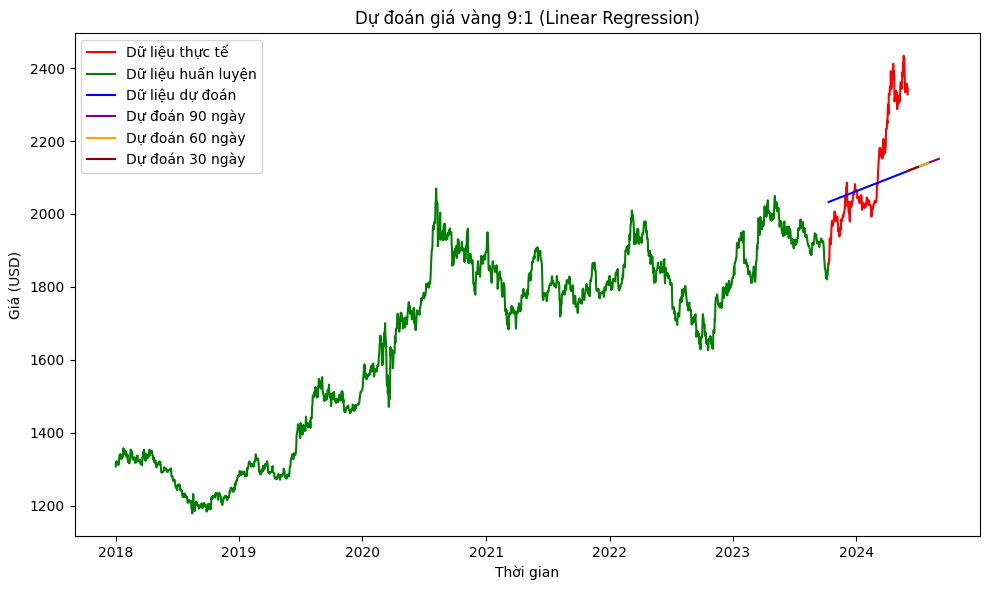

In [ ]:
df_gold = pd.read_csv(r'/content/gold_price_2018_2024.csv')

df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Day Number'] = df_gold['Date'].rank(method='dense').astype(int)
df_gold.columns = ['Date','Price','Day Number']
df_gold = df_gold.dropna()

train_size = int(0.9 * len(df_gold))
test_size = len(df_gold) - train_size

train_data = df_gold.iloc[:train_size]
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_gold.iloc[train_size:]
test_data.columns = ['Date','Actual Price','Day Number']

X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]

Y_predict = 1268.5200 + 0.3622 * X1
test_data.insert(1, "Price Predict", Y_predict)

last_day_number = df_gold['Day Number'].max()

# Dự đoán từ 01/06/2024 đến 01/07/2024 (31 ngày)
future_dates_1 = pd.date_range(start='2024-06-01', end='2024-07-01')
future_day_numbers_1 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_1))
future_data_1 = pd.DataFrame({'Date': future_dates_1, 'Day Number': future_day_numbers_1})
future_data_1.insert(1, "Price Predict", (1268.5200 + 0.3622 * (((future_data_1[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/08/2024 (62 ngày)
future_dates_2 = pd.date_range(start='2024-06-01', end='2024-08-01')
future_day_numbers_2 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_2))
future_data_2 = pd.DataFrame({'Date': future_dates_2, 'Day Number': future_day_numbers_2})
future_data_2.insert(1, "Price Predict", (1268.5200 + 0.3622 * (((future_data_2[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/09/2024 (93 ngày)
future_dates_3 = pd.date_range(start='2024-06-01', end='2024-09-01')
future_day_numbers_3 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_3))
future_data_3 = pd.DataFrame({'Date': future_dates_3, 'Day Number': future_day_numbers_3})
future_data_3.insert(1, "Price Predict", (1268.5200 + 0.3622 * (((future_data_3[['Day Number']]).to_numpy())[:, 0])))

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Actual Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data_3['Date'], future_data_3['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data_2['Date'], future_data_2['Price Predict'], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data_1['Date'], future_data_1['Price Predict'], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá vàng 9:1 (Linear Regression)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Đánh giá mô hình với dữ liệu giá vàng
actual_gold = test_data['Actual Price'].values
predict_gold = test_data['Price Predict'].values

rmse_gold = np.sqrt(mean_squared_error(actual_gold, predict_gold))
mape_gold = np.mean(np.abs((actual_gold - predict_gold) / actual_gold)) * 100
mae_gold = mean_absolute_error(actual_gold, predict_gold)

print(f'RMSE: {rmse_gold}')
print(f'MAPE: {mape_gold}%')
print(f'MAE: {mae_gold}')

RMSE: 134.8305312607038
MAPE: 4.59828312835028%
MAE: 101.88389385482681


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     452.3
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           4.41e-91
Time:                        11:32:40   Log-Likelihood:                -12699.
No. Observations:                2109   AIC:                         2.540e+04
Df Residuals:                    2107   BIC:                         2.541e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        861.9123      4.346    198.335      0.0

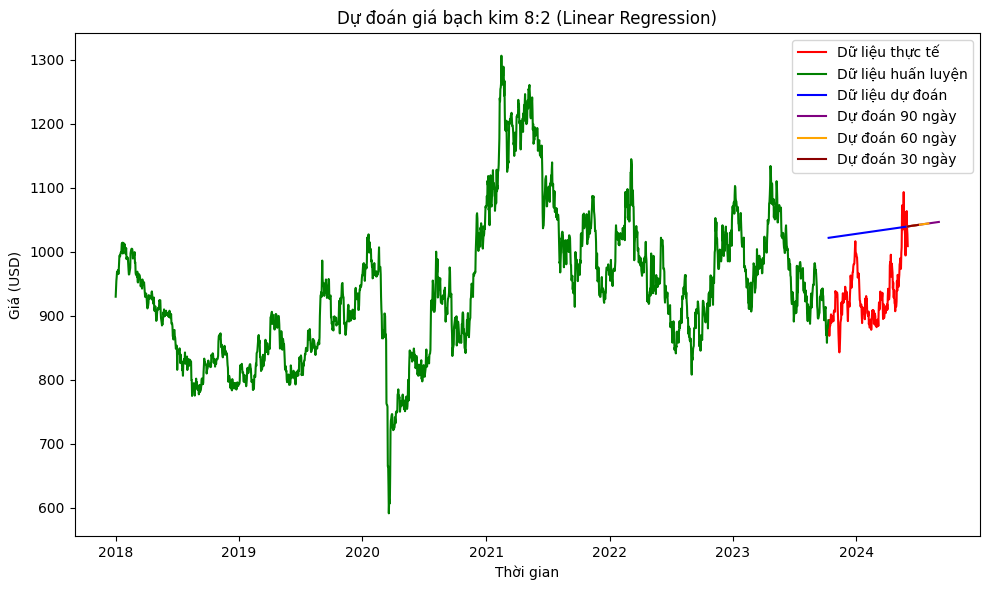

In [ ]:
df_platium = pd.read_csv(r'/content/platium_price_2018_2024.csv')
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
df_platium['Day Number'] = df_platium['Date'].rank(method='dense').astype(int)
df_platium.columns = ['Date','Price','Day Number']
df_platium = df_platium.dropna()

train_data = df_platium.iloc[:train_size]
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_platium.iloc[train_size:]
test_data.columns = ['Date','Actual Price','Day Number']

X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]
Y_predict = 861.9123 + 0.0759 * X1

test_data.insert(1, "Price Predict", Y_predict)

last_day_number = df_platium['Day Number'].max()

# Dự đoán từ 01/06/2024 đến 01/07/2024 (31 ngày)
future_dates_1 = pd.date_range(start='2024-06-01', end='2024-07-01')
future_day_numbers_1 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_1))
future_data_1 = pd.DataFrame({'Date': future_dates_1, 'Day Number': future_day_numbers_1})
future_data_1.insert(1, "Price Predict", (861.9123 + 0.0759 * (((future_data_1[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/08/2024 (62 ngày)
future_dates_2 = pd.date_range(start='2024-06-01', end='2024-08-01')
future_day_numbers_2 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_2))
future_data_2 = pd.DataFrame({'Date': future_dates_2, 'Day Number': future_day_numbers_2})
future_data_2.insert(1, "Price Predict", (861.9123 + 0.0759 * (((future_data_2[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/09/2024 (93 ngày)
future_dates_3 = pd.date_range(start='2024-06-01', end='2024-09-01')
future_day_numbers_3 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_3))
future_data_3 = pd.DataFrame({'Date': future_dates_3, 'Day Number': future_day_numbers_3})
future_data_3.insert(1, "Price Predict", (861.9123 + 0.0759 * (((future_data_3[['Day Number']]).to_numpy())[:, 0])))

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Actual Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data_3['Date'], future_data_3['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data_2['Date'], future_data_2['Price Predict'], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data_1['Date'], future_data_1['Price Predict'], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạch kim 8:2 (Linear Regression)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Đánh giá mô hình với dữ liệu giá bạch kim
actual_platium = test_data['Actual Price'].values
predict_platium = test_data['Price Predict'].values

rmse_platium = np.sqrt(mean_squared_error(actual_platium, predict_platium))
mape_platium = np.mean(np.abs((actual_platium - predict_platium) / actual_platium)) * 100
mae_platium = mean_absolute_error(actual_platium, predict_platium)

print(f'RMSE: {rmse_platium}')
print(f'MAPE: {mape_platium}%')
print(f'MAE: {mae_platium}')

RMSE: 106.7442621508666
MAPE: 10.867678616111814%
MAE: 99.44596975601911


                            OLS Regression Results                            
Dep. Variable:            Train Price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1992.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          7.82e-307
Time:                        11:32:48   Log-Likelihood:                -5317.6
No. Observations:                2109   AIC:                         1.064e+04
Df Residuals:                    2107   BIC:                         1.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2755      0.131    116.372      0.0

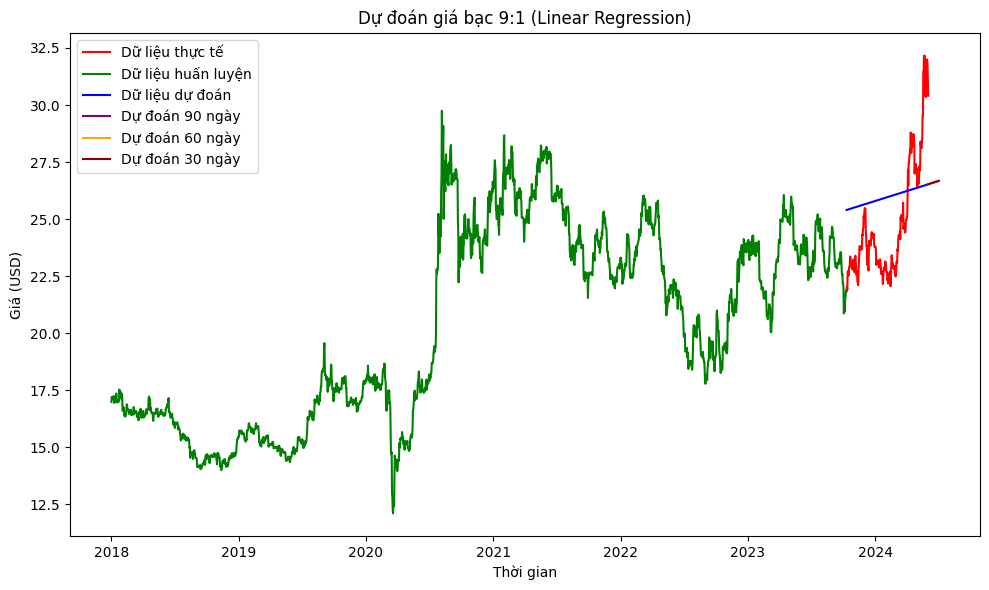

In [ ]:
df_silver = pd.read_csv(r'/content/silver_price_2018_2024.csv')
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Day Number'] = df_silver['Date'].rank(method='dense').astype(int)
df_silver.columns = ['Date','Price','Day Number']
df_silver = df_silver.dropna()


train_data = df_silver.iloc[:train_size]
train_data.columns = ['Date','Train Price','Day Number']
test_data = df_silver.iloc[train_size:]
test_data.columns = ['Date','Actual Price','Day Number']


X_train = train_data[['Day Number']]
X_train = sm.add_constant(X_train)
Y_train = train_data['Train Price']
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

X_test = test_data[['Day Number']]
X_test_array = X_test.to_numpy()
X1 = X_test_array[:, 0]

Y_predict = 15.2755 + 0.0048 * X1

test_data.insert(1, "Price Predict", Y_predict)

last_day_number = df_silver['Day Number'].max()

# Dự đoán từ 01/06/2024 đến 01/07/2024 (31 ngày)
future_dates_1 = pd.date_range(start='2024-06-01', end='2024-07-01')
future_day_numbers_1 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_1))
future_data_1 = pd.DataFrame({'Date': future_dates_1, 'Day Number': future_day_numbers_1})
future_data_1.insert(1, "Price Predict", (15.2755 + 0.0048 * (((future_data_1[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/08/2024 (62 ngày)
future_dates_2 = pd.date_range(start='2024-06-01', end='2024-07-01')
future_day_numbers_2 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_2))
future_data_2 = pd.DataFrame({'Date': future_dates_2, 'Day Number': future_day_numbers_2})
future_data_2.insert(1, "Price Predict", (15.2755 + 0.0048 * (((future_data_2[['Day Number']]).to_numpy())[:, 0])))

# Dự đoán từ 01/06/2024 đến 01/09/2024 (93 ngày)
future_dates_3 = pd.date_range(start='2024-06-01', end='2024-07-01')
future_day_numbers_3 = range(last_day_number + 1, last_day_number + 1 + len(future_dates_3))
future_data_3 = pd.DataFrame({'Date': future_dates_3, 'Day Number': future_day_numbers_3})
future_data_3.insert(1, "Price Predict", (15.2755 + 0.0048 * (((future_data_3[['Day Number']]).to_numpy())[:, 0])))

plt.figure(figsize=(10, 6))

plt.plot(test_data['Date'], test_data['Actual Price'], label='Dữ liệu thực tế', color='red')
plt.plot(train_data['Date'], train_data['Train Price'], label='Dữ liệu huấn luyện', color='green')
plt.plot(test_data['Date'], test_data['Price Predict'], label='Dữ liệu dự đoán', color='blue')
plt.plot(future_data_3['Date'], future_data_3['Price Predict'], label='Dự đoán 90 ngày', color='purple')
plt.plot(future_data_2['Date'], future_data_2['Price Predict'], label='Dự đoán 60 ngày', color='orange')
plt.plot(future_data_1['Date'], future_data_1['Price Predict'], label='Dự đoán 30 ngày', color='darkred')

plt.title('Dự đoán giá bạc 9:1 (Linear Regression)')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Đánh giá mô hình với dữ liệu giá bạc
actual_silver = test_data['Actual Price'].values
predict_silver = test_data['Price Predict'].values

rmse_silver = np.sqrt(mean_squared_error(actual_silver, predict_silver))
mape_silver = np.mean(np.abs((actual_silver - predict_silver) / actual_silver)) * 100
mae_silver = mean_absolute_error(actual_silver, predict_silver)

print(f'RMSE: {rmse_silver}')
print(f'MAPE: {mape_silver}%')
print(f'MAE: {mae_silver}')

RMSE: 2.5651555425183385
MAPE: 9.454598277553144%
MAE: 2.3122166320480844
